In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Аппроксимация

Начальное изображение

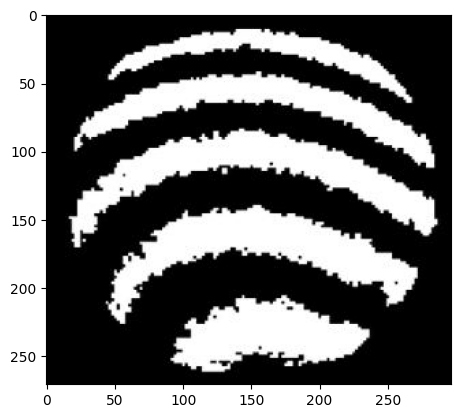

In [71]:
im = plt.imread('pic1.png')

plt.imshow(im)
plt.show()

Вспомогательные функции

In [72]:
def is_black(rgba):
  return rgba[0] == rgba[1] == rgba[2] == 0

def is_white(rgba):
  return rgba[0] == rgba[1] == rgba[2] == 1

Нужно почистить изображение

In [73]:
im2 = np.copy(im)

for y in range(len(im2)):
  for x in range(len(im2[0])):
    current = im2[y][x]
    if not is_black(current) and not is_white(current):
      current_sum = sum(current)
      im2[y][x] = [0, 0, 0, 1] if current_sum < 3 else [1, 1, 1, 1]

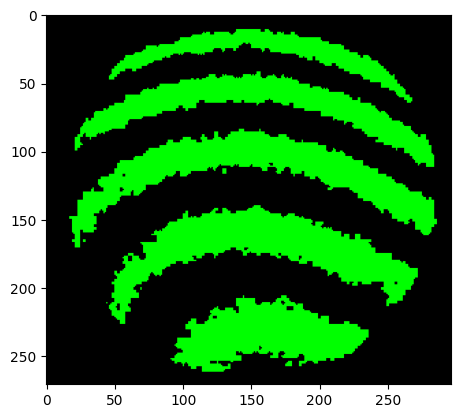

In [77]:
for y in range(len(im2)):
  for x in range(len(im2[0])):
    is_prev_black = False if y == 0 else is_black(im2[y - 1][x])
    is_curr_white = is_white(im2[y][x])

    if is_prev_black and is_curr_white:
      im2[y][x] = [0, 1, 0, 1]

plt.imshow(im2)